In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from lint_analysis.bin_counts.models import BinCount

In [3]:
def plot_series(token):
    
    series = BinCount.token_series(token)
    
    plt.plot(series)

    plt.title('"{}"'.format(token))
    plt.xlabel('Narrative time')
    plt.ylabel('Word count')
    plt.show()

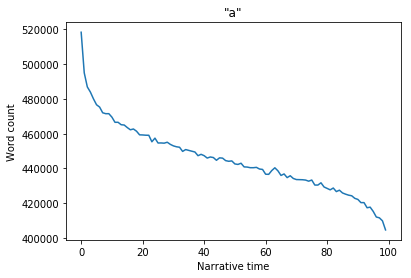

In [4]:
plot_series('a')

In [ ]:
import numpy as np

from scipy.stats import chisquare

def token_chisquare(token):
    
    series = BinCount.token_series(token)
    
    expected = np.full(len(series), series.sum() / len(series))
    
    return chisquare(series, expected)

In [ ]:
from joblib import Memory

mem = Memory('cache')

token_counts = mem.cache(BinCount.token_counts)

tokens = token_counts(10000)

________________________________________________________________________________
[Memory] Calling lint_analysis.bin_counts.models.token_counts...
token_counts(10000)


In [ ]:
data = []
for token, count in list(tokens.items())[:1000]:
    chi, p = token_chisquare(token)
    data.append((token, count, chi, p))

In [ ]:
import pandas as pd

df = pd.DataFrame(data, columns=('token', 'count', 'chi', 'p'))

df.sort_values('chi', ascending=False, inplace=True)

In [ ]:
pd.set_option('display.max_rows', 1000)

df.head(100)